In [3]:
import pandas
import numpy
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter('ignore')

In [4]:
data_file= pandas.read_csv('data.csv')
data_file.head()

,report_date,location,location_type,data_field,data_field_code,time_period,time_period_type,value,unit
0,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,NaN,NaN,0,cases
1,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,NaN,NaN,0,cases
2,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,AR0003,NaN,NaN,2,cases
3,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_imported_cases,AR0004,NaN,NaN,1,cases
4,2016-03-19,Argentina-Buenos_Aires,province,cumulative_cases_under_study,AR0005,NaN,NaN,127,cases




## Clean data

In [5]:
data_file.drop(['time_period' , 'time_period_type' , 'unit'] , axis=1,inplace=True)

In [6]:
data_file.rename({'report_date':'date' , 'location_type':'lctype' , 'data_field_code':'code'} , axis=1 , inplace=True)


In [7]:
data_file['date']=pandas.to_datetime(data_file['date'], errors='coerce', format='%Y-%m-%d')
data_file['day'] = data_file['date'].dt.day
data_file['month'] = data_file['date'].dt.month
data_file['mon_day']=data_file['day'].astype(str)+"/"+ data_file['month'].astype(str) 

# show data field code 'AR0005' values for 'Argentina-Catamarca' for entire duration

In [8]:
AR0005data = data_file[(data_file['location']=='Argentina-Catamarca') &(data_file['code']=='AR0005')]

In [9]:
AR0005data['value']=list(map(int ,AR0005data['value']))
AR0005data

,date,location,lctype,data_field,code,value,day,month,mon_day
16,2016-03-19,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,14,19.0,3.0,19.0/3.0
160,2016-03-26,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15,26.0,3.0,26.0/3.0
304,2016-04-02,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15,2.0,4.0,2.0/4.0
448,2016-04-09,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15,9.0,4.0,9.0/4.0
592,2016-04-16,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15,16.0,4.0,16.0/4.0
736,2016-04-29,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15,29.0,4.0,29.0/4.0
880,2016-05-07,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,16,7.0,5.0,7.0/5.0
1024,2016-05-14,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15,14.0,5.0,14.0/5.0
1168,2016-05-22,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,16,22.0,5.0,22.0/5.0
1312,2016-05-30,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15,30.0,5.0,30.0/5.0


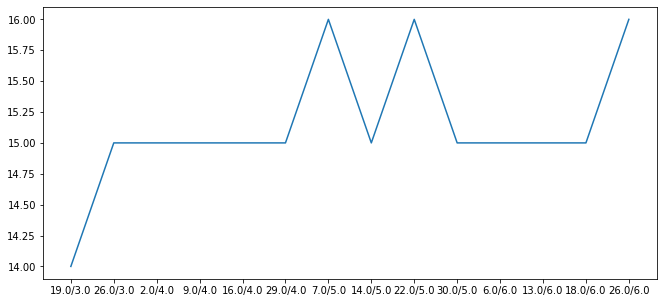

In [10]:
#AR0005data.plot.line()

plt.figure(figsize=(11 ,5))
plt.plot(AR0005data['mon_day'] ,AR0005data['value'] )
plt.show()

# Plot 'Argentina-CABA' and 'Argentina-Catamarca' for number of cases values for entire duration to identify the difference.

In [11]:
casevalue = data_file[(data_file['location']=='Argentina-CABA') |(data_file['location']=='Argentina-Catamarca')]
casevalue.set_index('location' , inplace=True)
#casevalue
casevalue.sort_values(by=['location'] , inplace=True)
#print(casevalue)
casevalue['value']=list(map(int , casevalue['value']))
sumcaba=casevalue.loc[:'Argentina-CABA']['value'].sum()
sumcata=casevalue.loc['Argentina-Catamarca':]['value'].sum()
print(sumcaba)
print(sumcata)

1899
212


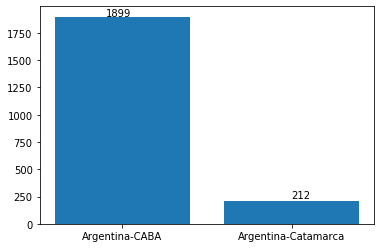

In [12]:
plt.bar(('Argentina-CABA' , 'Argentina-Catamarca') , (sumcaba ,sumcata)  )
plt.text(-0.1 , 1900 , sumcaba)
plt.text(1 , 235 , sumcata)
plt.show()

# Plot how data field values are distributed across the locations 'Argentina-Buenos_Aires', 'Argentina-CABA', 'Argentina-Catamarca'

In [13]:
data_file.head()

,date,location,lctype,data_field,code,value,day,month,mon_day
0,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,0,19.0,3.0,19.0/3.0
1,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,0,19.0,3.0,19.0/3.0
2,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,AR0003,2,19.0,3.0,19.0/3.0
3,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_imported_cases,AR0004,1,19.0,3.0,19.0/3.0
4,2016-03-19,Argentina-Buenos_Aires,province,cumulative_cases_under_study,AR0005,127,19.0,3.0,19.0/3.0


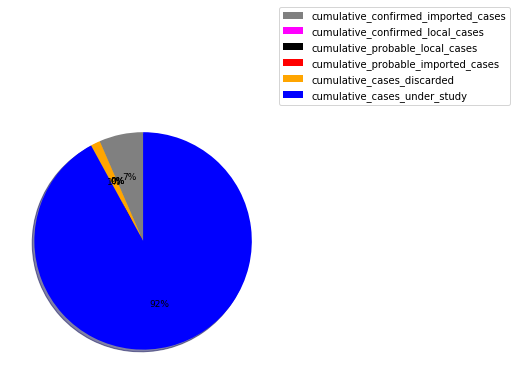

Argentina-CABA


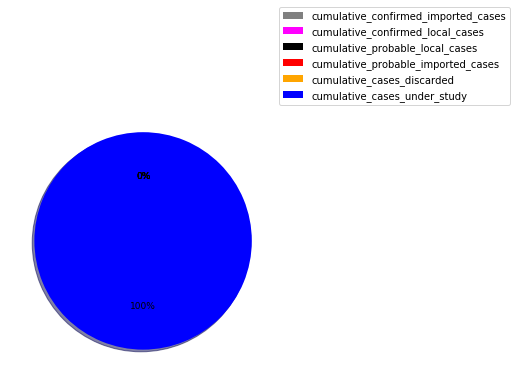

Argentina-Catamarca


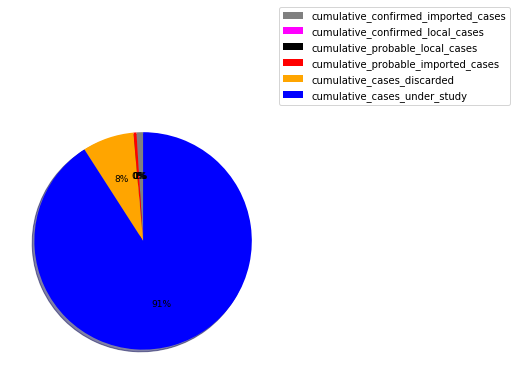

Argentina-Buenos_Aires


In [21]:
data=data_file[(data_file.location=="Argentina-CABA")|(data_file.location=="Argentina-Catamarca")|(data_file.location=="Argentina-Buenos_Aires")]
group=data.groupby("location")
k=["Argentina-CABA","Argentina-Catamarca","Argentina-Buenos_Aires"]
for a in k:
    groups=group.get_group(a)
    
    dfvalues=groups["data_field"].value_counts()
    dfvalues=list(dfvalues.index)
    groups1=groups.groupby("data_field")
    l=[]
    colors=["grey",'magenta','k',"r","orange","b"]
    for i in dfvalues:
        t=groups1.get_group(i)
        x=list(map(int ,t['value']))
        l.append(sum(x))
    

    #plt.tigroupsdfvaluest_layout()
    plt.figure(figsize=(5,5))
    
    plt.pie(l,colors=colors,shadow=True, autopct="%0.0f%%", startangle=90,textprops={'fontsize': 9},labeldistance=1.1)

    plt.legend(loc=(1,1) , labels=dfvalues)

    plt.show()
    print(a)

# Build a program to predict the correct word for wrongly typed word

In [15]:
import re
from collections import Counter

def words(text): return re.findall(r'\w+', text.lower())

WORDS = Counter(words(open('big.txt').read()))
def P(word, N=sum(WORDS.values())): 
    "Probability of `word`."
    return WORDS[word] / N


def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)
def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])
def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)
def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))



while True:
    
    print("\nTo check enter the word, type exit to quit")
    check  =input("Enter the word : " )
    if check.lower() != "exit":
        ans = correction(check)
        if check==ans:
            print(f"Either this word doesn't exsist or isn't available in my database")
        else:
            print("The correct word might be : "+ans)
        print("\n################################################################")
    else:
        break


To check enter the word, type exit to quit
Enter the word : exit
